In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os
\
import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


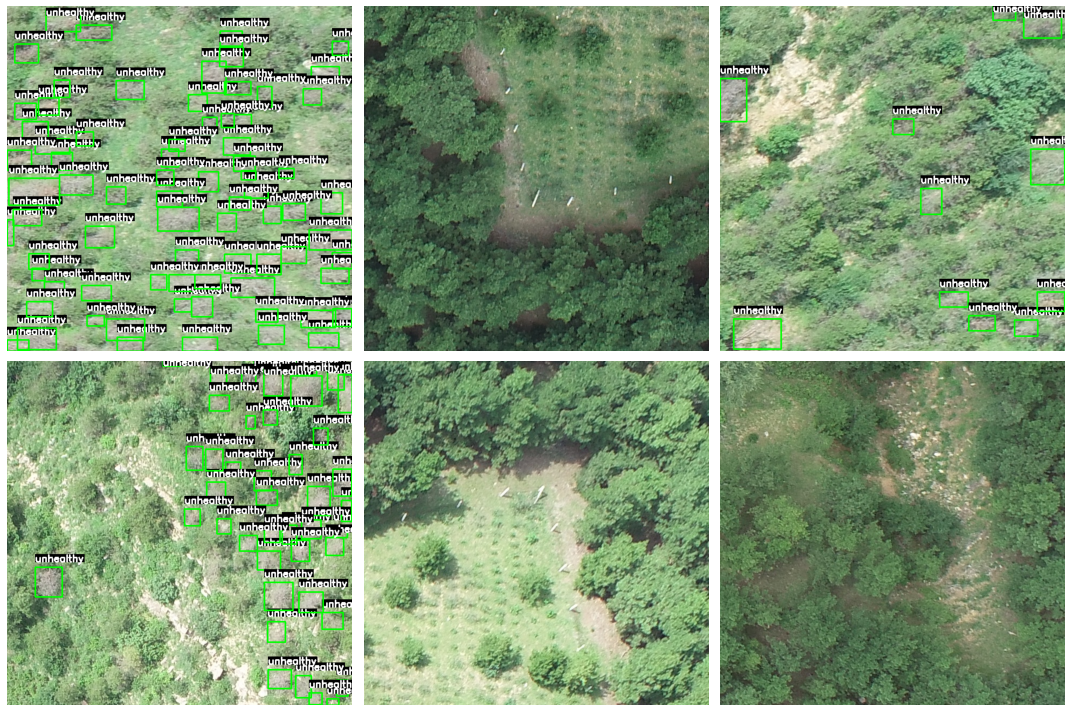

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/images"
labels_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:02<00:00, 21.0MB/s]


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=50, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO9c', name='Large_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=data.yaml , epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO9c, name=Large_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels.cache... 4536 images, 1330 backgrounds, 0 corrupt: 100%|██████████| 4536/4536 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/val/labels.cache... 567 images, 168 backgrounds, 0 corrupt: 100%|██████████| 567/567 [00:00<?, ?it/s]


Plotting labels to YOLO9c/Large_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO9c/Large_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      22.3G      1.528      1.255      1.213        640        640: 100%|██████████| 142/142 [01:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        567      12655      0.809      0.562      0.725      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      24.7G      1.287     0.8117      1.089        451        640: 100%|██████████| 142/142 [01:10<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        567      12655      0.759      0.821      0.858      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      23.9G      1.254     0.7691      1.076        502        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]

                   all        567      12655      0.776      0.828      0.871      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      23.7G      1.252     0.7658      1.075        516        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]

                   all        567      12655      0.785      0.809       0.87      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      24.4G      1.226     0.7488      1.069        494        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        567      12655      0.841      0.799      0.894      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      24.1G      1.209     0.7315       1.06        351        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]

                   all        567      12655       0.83      0.839      0.905      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      22.2G      1.195     0.7077      1.053        762        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        567      12655      0.839      0.825      0.903      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      24.1G      1.183        0.7      1.046        514        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        567      12655      0.858      0.828      0.916      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        24G      1.169     0.6931       1.04        394        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]

                   all        567      12655      0.814      0.804      0.883      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      23.2G      1.168     0.6833       1.04        394        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]

                   all        567      12655      0.792      0.822      0.878      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      22.3G      1.162      0.671      1.036        671        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        567      12655      0.808       0.81      0.885      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      23.6G      1.147     0.6582      1.034        565        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655       0.82      0.831      0.895      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      23.2G       1.14      0.659      1.029        752        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.836      0.856      0.916      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      24.7G      1.133     0.6454       1.03        789        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.849      0.845      0.918      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      22.2G      1.133      0.646      1.031        635        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.855      0.858      0.925      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      22.1G      1.123     0.6362       1.02        705        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.847      0.862      0.923      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      23.2G      1.123     0.6295       1.02       1060        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.846      0.841      0.915      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      24.6G      1.108     0.6248      1.018        525        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.876      0.858      0.932      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      23.4G      1.109     0.6182      1.019        608        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        567      12655      0.864      0.856      0.928      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      22.6G      1.108     0.6131      1.016        701        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        567      12655      0.864      0.868      0.932      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      23.2G      1.107     0.6156      1.019        668        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.824      0.851      0.915      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      23.8G      1.095     0.6023      1.016        424        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.871      0.855       0.93      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      24.5G      1.094     0.6025      1.016        790        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        567      12655      0.871      0.862      0.932      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      22.9G      1.088     0.6028      1.012        499        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.854      0.859      0.928      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      22.4G      1.084     0.5965      1.009        842        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        567      12655      0.864       0.87      0.934      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      22.4G      1.082     0.5894      1.006        892        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.828      0.864      0.919      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        24G       1.08     0.5898      1.006        593        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.853      0.879      0.932      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      23.1G      1.076     0.5838       1.01        486        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.882      0.868      0.939      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      23.4G      1.062     0.5794     0.9974        408        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655       0.84      0.869      0.926      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      22.5G       1.06     0.5744      1.001        604        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

                   all        567      12655      0.874      0.869      0.937      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      23.3G      1.054     0.5689     0.9975        511        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        567      12655      0.866      0.873      0.936      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      22.2G      1.054     0.5698      1.002        727        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.868      0.874      0.936      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      21.8G       1.05     0.5644     0.9957        774        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        567      12655      0.882      0.874       0.94      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      22.4G      1.039     0.5548     0.9927        440        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        567      12655      0.862       0.87      0.932      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      24.5G      1.034     0.5454     0.9922        625        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.876      0.878      0.941      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      24.1G      1.033     0.5476     0.9926        511        640: 100%|██████████| 142/142 [01:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.853      0.879      0.931      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      22.2G       1.03     0.5445     0.9894        784        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.869      0.881       0.94      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      22.8G       1.03     0.5422      0.991        610        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.866      0.876      0.936      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      22.4G      1.017     0.5336     0.9836        720        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.878      0.878      0.941      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      23.4G       1.02     0.5321      0.986        553        640: 100%|██████████| 142/142 [01:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.872      0.874      0.938      0.669


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      21.5G      1.019     0.5305      1.015        444        640: 100%|██████████| 142/142 [01:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655       0.88      0.875      0.939      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      21.7G      1.005      0.519      1.011        213        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.873      0.875      0.939      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      21.7G      1.005     0.5155      1.012        264        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        567      12655      0.854      0.879      0.933      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      21.7G     0.9908     0.5046      1.006        388        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.877      0.875      0.939      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      21.5G     0.9871     0.5056      1.003        368        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.864      0.873      0.935      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      21.7G     0.9826     0.4964      1.001        352        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        567      12655      0.873      0.878      0.939      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      21.4G     0.9731     0.4867     0.9971        272        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.867      0.884      0.939      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      21.5G     0.9781     0.4873      1.002        343        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.879      0.876      0.939      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      21.5G     0.9618     0.4806     0.9936        156        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        567      12655      0.874      0.875      0.938      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      21.5G     0.9601     0.4751     0.9923        431        640: 100%|██████████| 142/142 [01:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        567      12655      0.873      0.879      0.939      0.672



50 epochs completed in 1.047 hours.
Optimizer stripped from YOLO9c/Large_try/weights/last.pt, 51.6MB
Optimizer stripped from YOLO9c/Large_try/weights/best.pt, 51.6MB

Validating YOLO9c/Large_try/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]


                   all        567      12655      0.873      0.876      0.938      0.674
Speed: 0.3ms preprocess, 10.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to YOLO9c/Large_try


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fdd93493340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO9c/Large_try/results.csv')

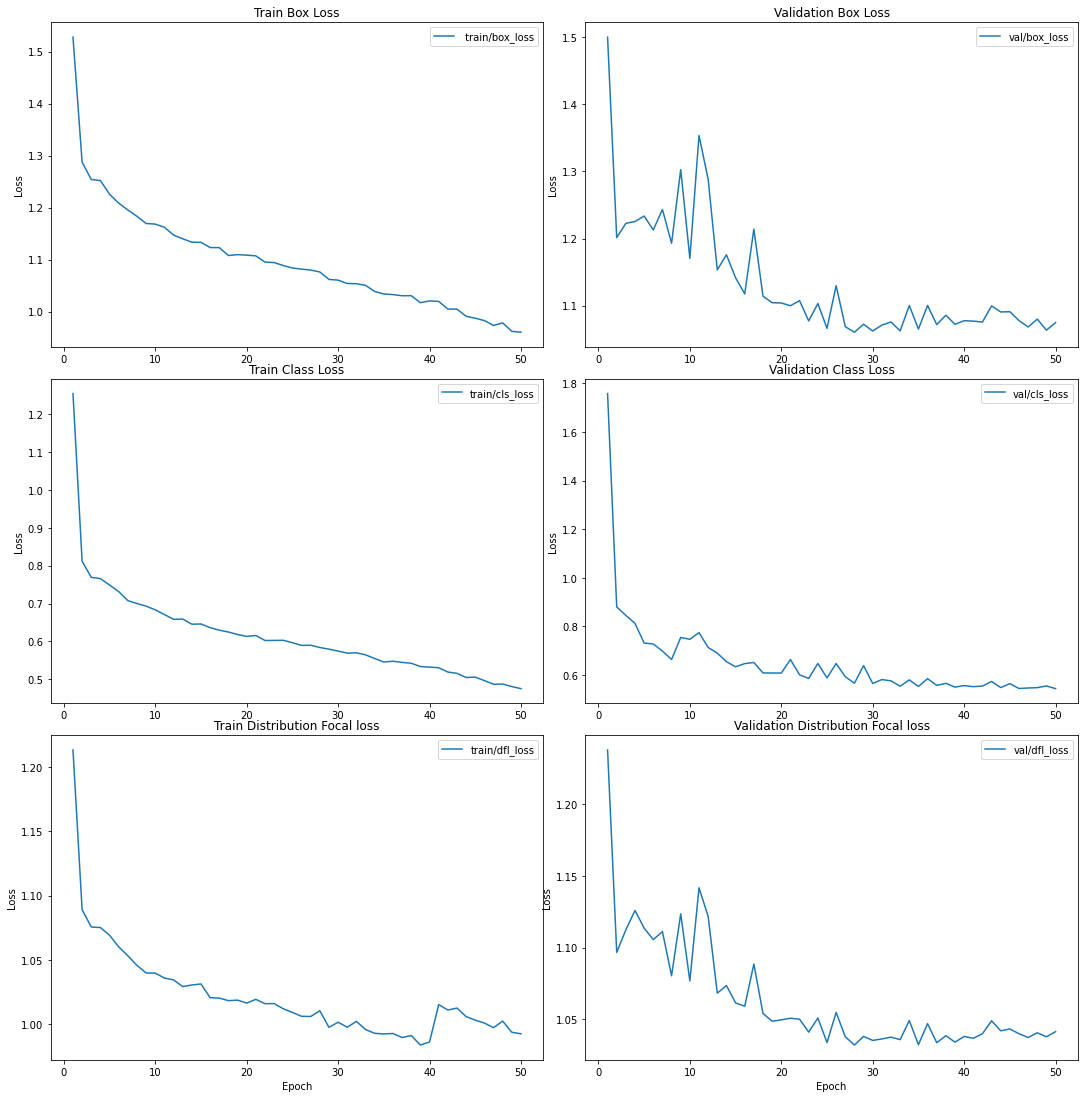

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

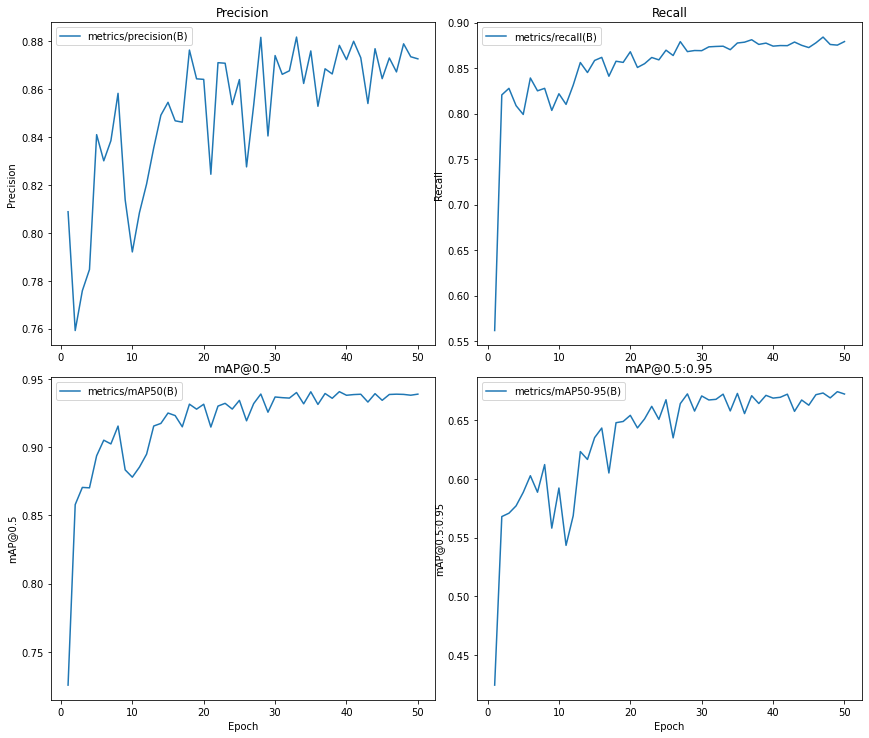

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

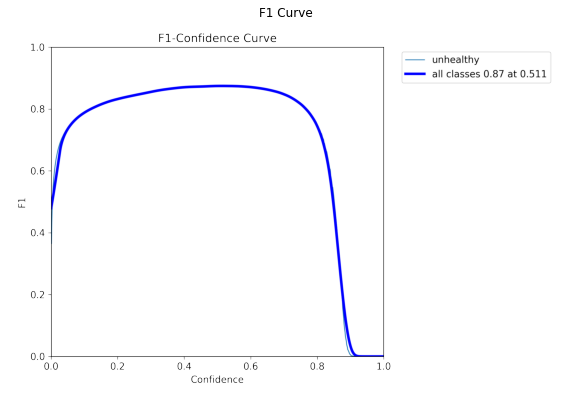

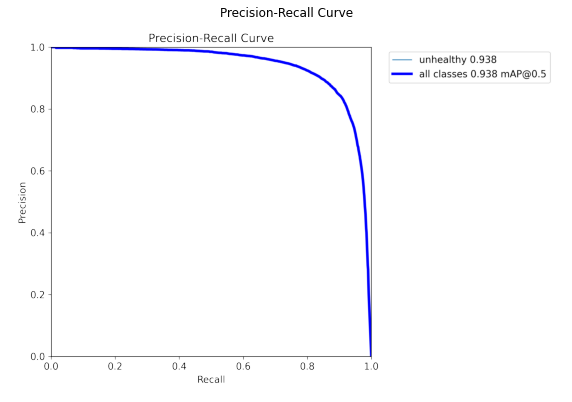

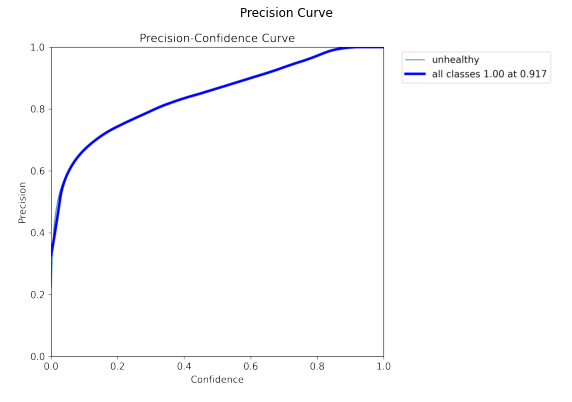

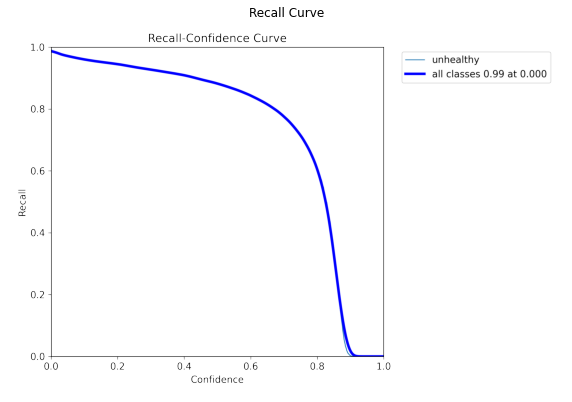

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO9c/Large_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO9c/Large_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO9c/Large_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO9c/Large_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

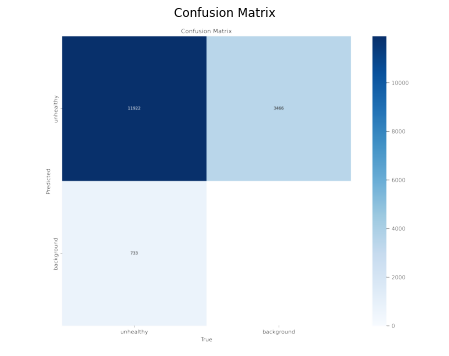

In [10]:
confusion_matrix = Image.open("YOLO9c/Large_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg: 640x640 70 unhealthys, 15.9ms
Speed: 1.1ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


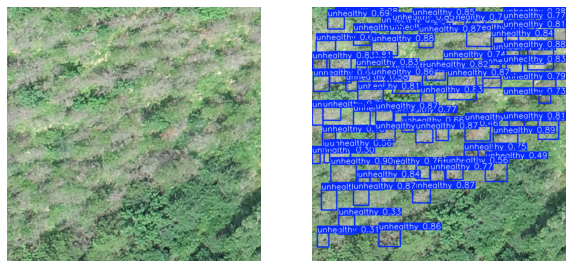

In [11]:
res = model('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();